## Importing Libraries

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [7]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [8]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [29]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [30]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [ 36.5   31.75  27.25]
   [ 14.75  13.25  12.  ]
   [  3.25   3.5    4.25]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [141.   132.75 121.75]
   [ 63.    56.25  52.  ]
   [  4.25   1.25   0.25]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [105.5   94.5   83.  ]
   [109.75 101.    93.75]
   [ 12.     5.75   

## Building Model

In [13]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [14]:
model=Sequential()

In [ ]:
## Building Convolutional Layer

In [33]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [37]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [38]:
model.add(Dropout(0.25))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(units=1500, activation='relu'))

In [41]:
model.add(Dropout(0.25))

In [42]:
## Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [43]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [45]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1738s 790ms/step - accuracy: 0.4387 - loss: 1.9704 - val_accuracy: 0.8360 - val_loss: 0.5108
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1756s 799ms/step - accuracy: 0.8389 - loss: 0.5007 - val_accuracy: 0.9148 - val_loss: 0.2666
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1763s 802ms/step - accuracy: 0.9078 - loss: 0.2873 - val_accuracy: 0.9226 - val_loss: 0.2397
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1765s 803ms/step - accuracy: 0.9379 - loss: 0.1921 - val_accuracy: 0.9454 - val_loss: 0.1678
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1763s 802ms/step - accuracy: 0.9527 - loss: 0.1430 - val_accuracy: 0.9482 - val_loss: 0.1687
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1765s 803ms/step - accuracy: 0.9603 - loss: 0.1182 - val_accuracy: 0.9510 - val_loss: 0.1697
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1764s 803ms/step - accuracy: 0.9696 - loss: 0.0897 - val_accuracy: 0.9507 - val_loss: 0.1611
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1762s 802ms/s

## Model Evaluation

In [46]:
train_loss, train_acc=model.evaluate(training_set)
print('Training Accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 367s 167ms/step - accuracy: 0.9849 - loss: 0.0434
Training Accuracy: 0.9871968030929565


In [47]:
print(train_loss)

0.038171764463186264


In [48]:
val_loss, val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 92s 168ms/step - accuracy: 0.9603 - loss: 0.1317


In [49]:
print(val_loss, val_acc)

0.1363343447446823 0.9614158868789673


## Saving Model

In [50]:
model.save("trained_model.h5")

In [51]:
model.save("trained_model.keras")

In [52]:
training_history.history

{'accuracy': [0.6299737095832825,
  0.863418459892273,
  0.9172202944755554,
  0.9427412748336792,
  0.9566398859024048,
  0.964762806892395,
  0.9723877906799316,
  0.9767835736274719,
  0.9800127744674683,
  0.9831709265708923],
 'loss': [1.2407954931259155,
  0.42569103837013245,
  0.2547817528247833,
  0.17422859370708466,
  0.12986406683921814,
  0.10447150468826294,
  0.0816291868686676,
  0.06961482763290405,
  0.061819568276405334,
  0.05425957217812538],
 'val_accuracy': [0.8359890580177307,
  0.9148076772689819,
  0.9226041436195374,
  0.9453676342964172,
  0.9481561779975891,
  0.9510015845298767,
  0.950717031955719,
  0.9618711471557617,
  0.9665945768356323,
  0.9614158868789673],
 'val_loss': [0.5107680559158325,
  0.26659685373306274,
  0.23969410359859467,
  0.16782580316066742,
  0.16865316033363342,
  0.1697268933057785,
  0.16108016669750214,
  0.13219821453094482,
  0.11047011613845825,
  0.1363341361284256]}

In [53]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [54]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [55]:
training_history.history['accuracy']

[0.6299737095832825,
 0.863418459892273,
 0.9172202944755554,
 0.9427412748336792,
 0.9566398859024048,
 0.964762806892395,
 0.9723877906799316,
 0.9767835736274719,
 0.9800127744674683,
 0.9831709265708923]

## Accuracy Visualization

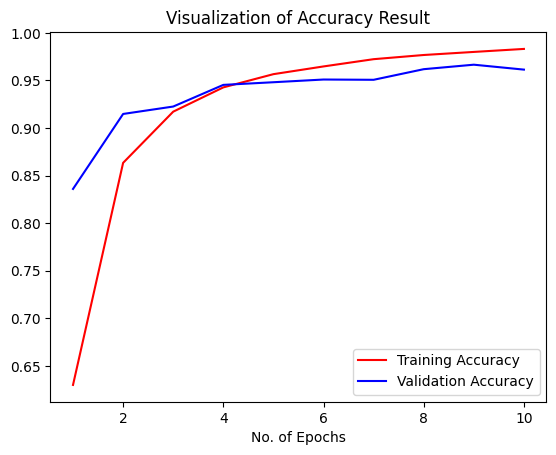

In [56]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Other metrics for Model Evaluation

In [9]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [16]:
model = tf.keras.models.load_model('trained_model.keras')

C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 466s 26ms/step


(array([[9.9999988e-01, 2.9278587e-13, 1.1669668e-14, ..., 4.0531891e-18,
         1.3419804e-17, 1.0527711e-15],
        [9.9999774e-01, 1.8010156e-10, 3.2749980e-11, ..., 1.8705513e-16,
         1.1332028e-14, 9.1901070e-12],
        [9.9999988e-01, 2.9910231e-11, 5.2739141e-12, ..., 4.1770885e-16,
         1.4588325e-14, 5.8342055e-12],
        ...,
        [5.5353275e-16, 4.8643329e-20, 6.9475827e-13, ..., 8.7825116e-18,
         1.7376924e-17, 1.0000000e+00],
        [7.3405588e-13, 1.6582819e-17, 7.2768007e-12, ..., 4.1625520e-15,
         1.2924836e-14, 1.0000000e+00],
        [2.2989670e-17, 1.5851493e-19, 3.4647620e-15, ..., 8.3845767e-17,
         2.6314578e-14, 9.9998331e-01]], dtype=float32),
 (17572, 38))

In [18]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [19]:
predicted_categories 

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [20]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [21]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(Y_true, predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.95      0.97       504
                                 Apple___Black_rot       1.00      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.96      0.97       440
                                   Apple___healthy       0.93      0.99      0.96       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.96      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.91      0.

In [26]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[481,   0,   0, ...,   0,   0,   0],
       [  0, 482,   0, ...,   0,   0,   0],
       [  0,   0, 424, ...,   1,   0,   1],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 470]], dtype=int64)

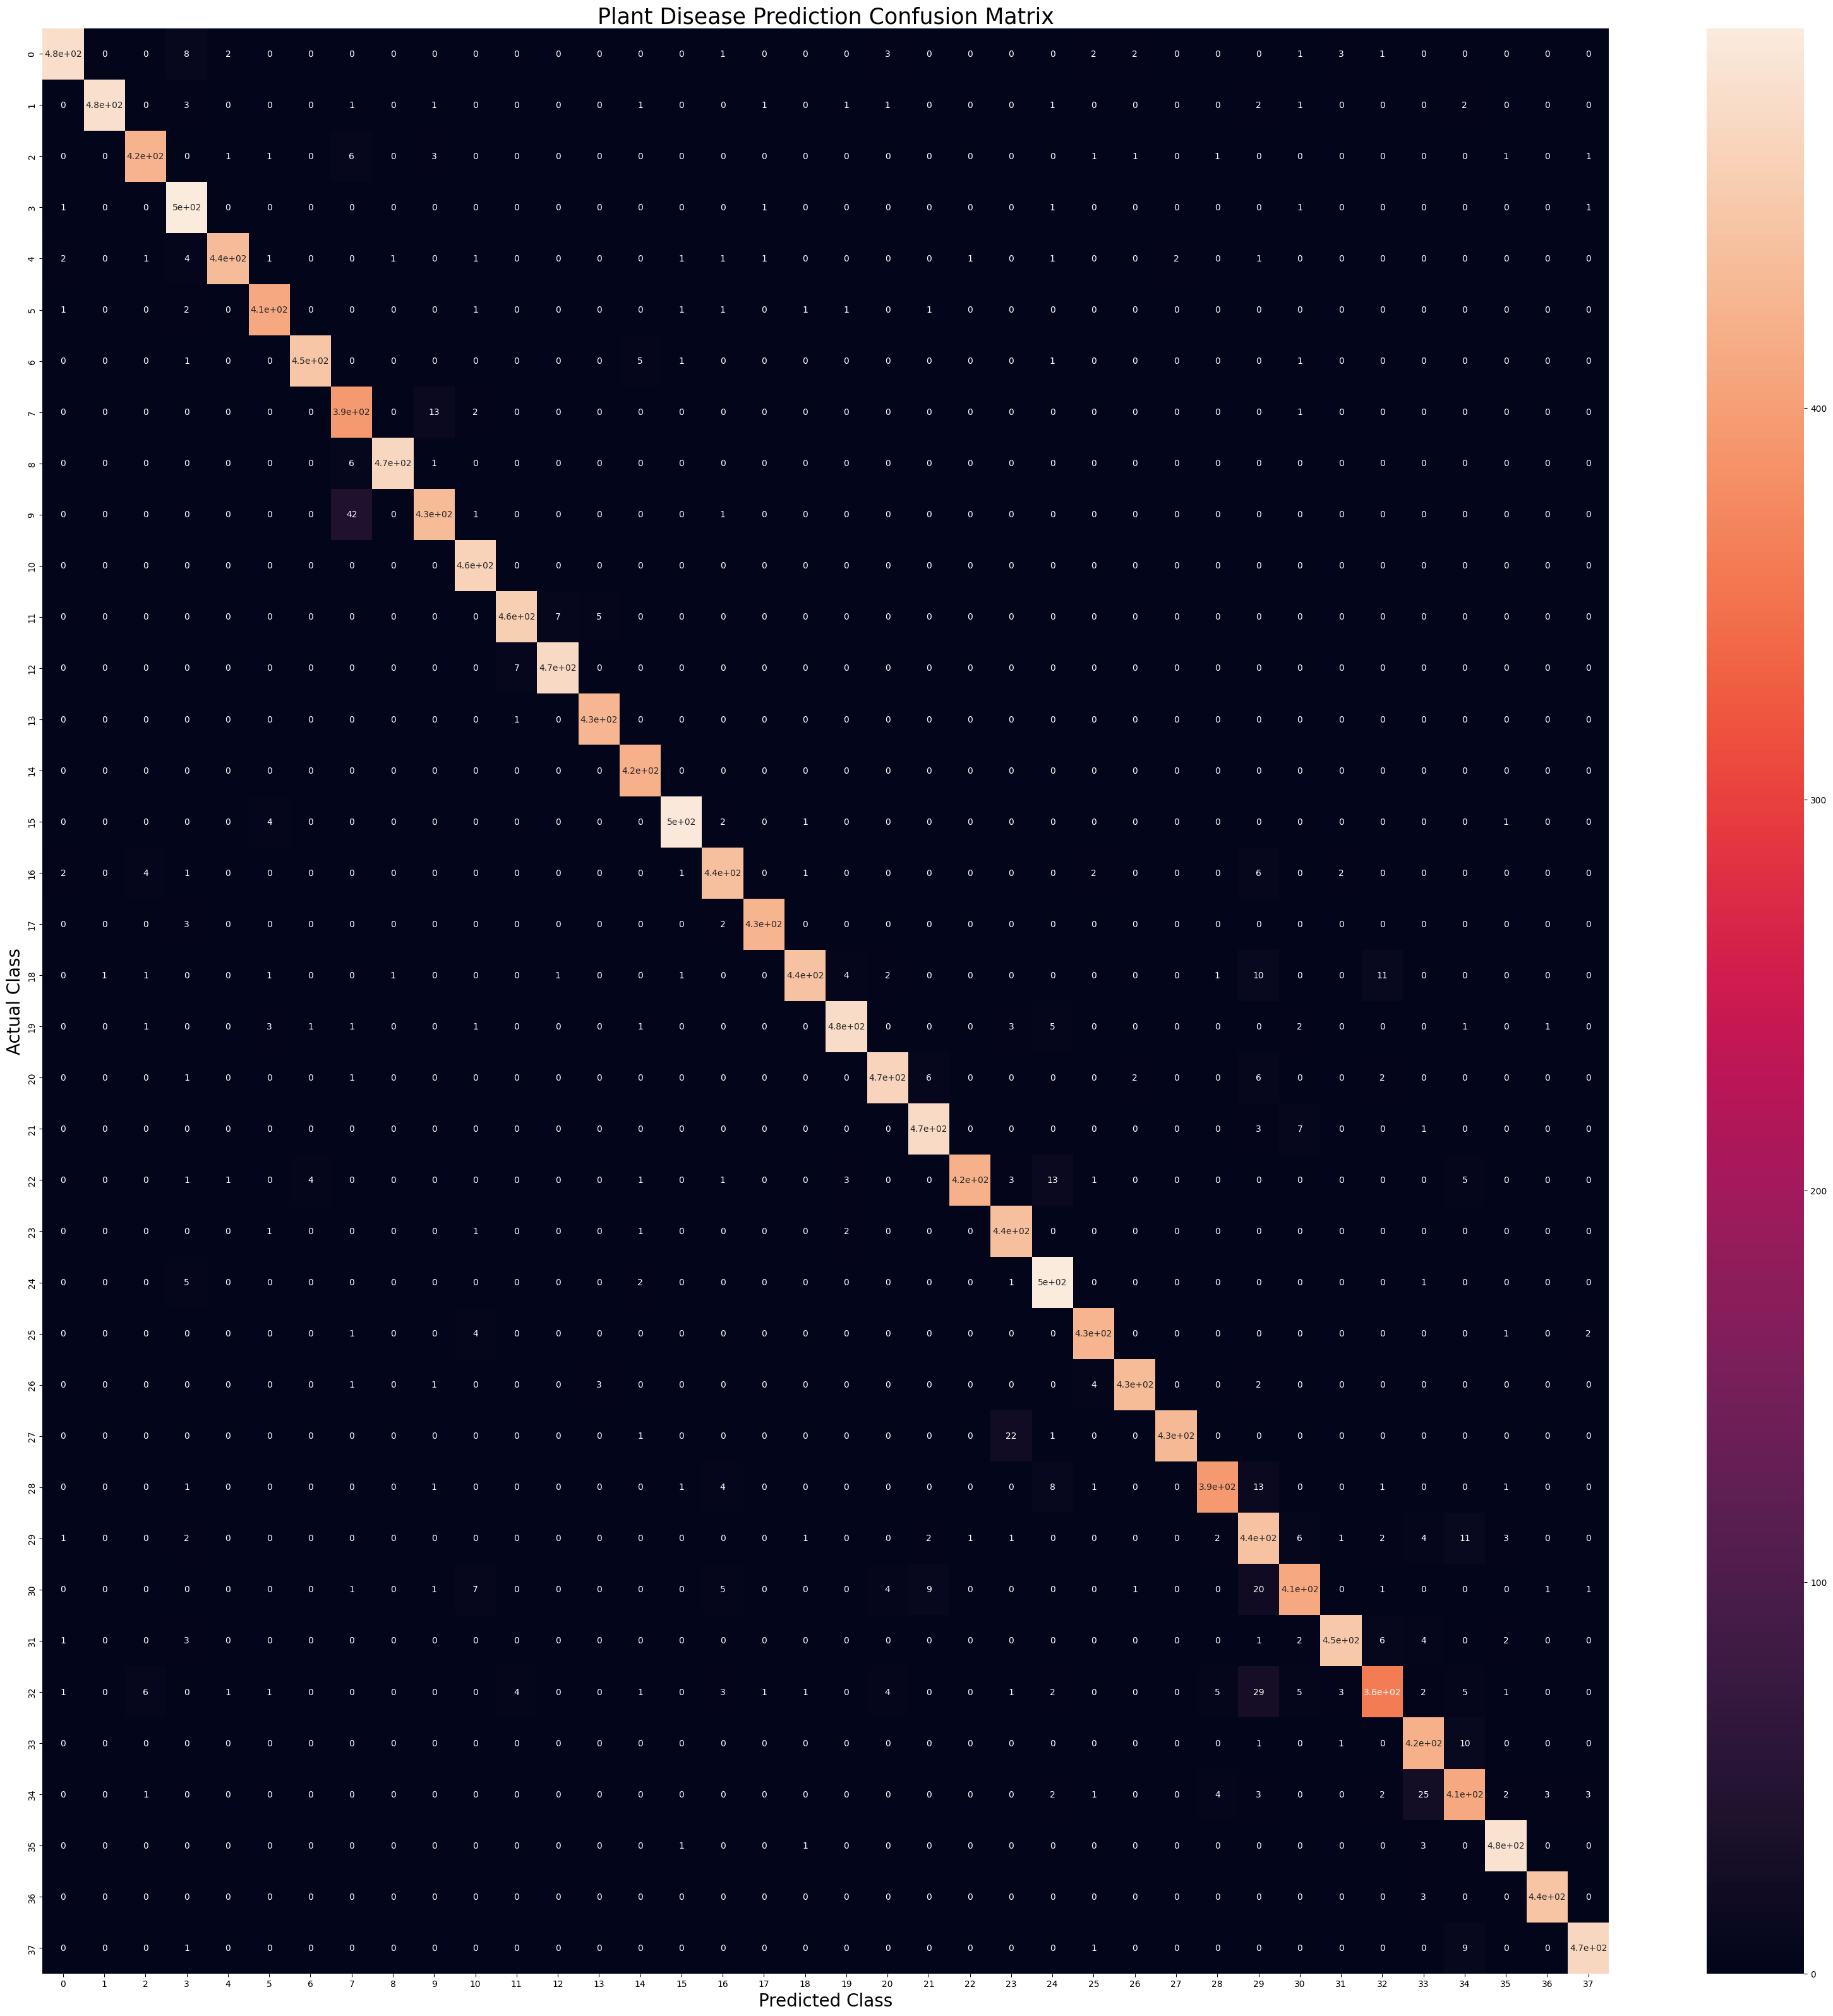

In [32]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()